**Laboratorio 4**

Arancibia Aguilar Daniel Andree - Ciencias de la computación

En este laboratorio hare nuevamente las regresiones de los anteriores laboratorios pero agregaremos la regularización a cada uno y comparare los valores para ver de que manera funciona mejor

Usaré 3 datasets para las regresiones

Regresión lineal, polinomica y ecuación de la normal: https://www.kaggle.com/datasets/thedevastator/improving-naval-vessel-condition-through-machine/data

Regresion de clasificación binaria: https://www.kaggle.com/datasets/bhaveshmisra/heart-disease-indicators

Regresion de clasificación multiclase: https://www.kaggle.com/datasets/nishan192/letterrecognition-using-svm

Revisare los datasets con PANDAS para comprobar si existen valores nulos en los datasets o si deben ser modificados

Importo google drive para cargar los datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Librerias para el laboratorio

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import sklearn as skl
from scipy import optimize
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline

# **Dataset "Maintenance Naval Vessel"** regresion linear multivariable, polinomica y ecuacion de la normal

Y = Gt Turbine Decay State Coefficient (TDSC)

In [ ]:
url = "/content/drive/MyDrive/SIS420/Lab4/Maintenance Naval Vessel.csv"
dataframe1 = pd.read_csv(url)
print(dataframe1)

         index    LP    SS        GT      GTR      GGn     SPT     PPT  \
0          0.0  1.14   3.0    289.96  1349.49  6677.38    7.58    7.58   
1          1.0  2.09   6.0   6960.18  1376.17  6828.47   28.20   28.20   
2          2.0  3.14   9.0   8379.23  1386.76  7111.81   60.36   60.36   
3          3.0  4.16  12.0  14724.40  1547.47  7792.63  113.77  113.77   
4          4.0  5.14  15.0  21636.43  1924.31  8494.78  175.31  175.31   
...        ...   ...   ...       ...      ...      ...     ...     ...   
11929  11929.0  5.14  15.0  21624.93  1924.34  8470.01  175.24  175.24   
11930  11930.0  6.18  18.0  29763.21  2306.75  8800.35  245.95  245.95   
11931  11931.0  7.15  21.0  39003.87  2678.05  9120.89  332.39  332.39   
11932  11932.0  8.21  24.0  50992.58  3087.43  9300.27  438.02  438.02   
11933  11933.0  9.30  27.0  72775.13  3560.40  9742.95  644.88  644.88   

            HP   CIAT    COAT  HTEP  CIAP   COAP  GTEGP    TIC    FF  CDSC  \
0       464.01  288.0  550.56  1.

In [ ]:
print(dataframe1.describe())

              index            LP            SS            GT           GTR  \
count  11934.000000  11934.000000  11934.000000  11934.000000  11934.000000   
mean    5966.500000      5.167778     15.000000  27247.499224   2136.289767   
std     3445.193391      2.627068      7.746291  22148.613136    774.083898   
min        0.000000      1.140000      3.000000    253.550000   1307.680000   
25%     2983.250000      3.140000      9.000000   8375.882500   1386.760000   
50%     5966.500000      5.140000     15.000000  21630.660000   1924.330000   
75%     8949.750000      7.150000     21.000000  39001.430000   2678.080000   
max    11933.000000      9.300000     27.000000  72784.870000   3560.740000   

                GGn           SPT           PPT            HP     CIAT  \
count  11934.000000  11934.000000  11934.000000  11934.000000  11934.0   
mean    8200.947797    227.336335    227.336335    735.495959    288.0   
std     1091.315523    200.495883    200.495883    173.680511     

**No hay valores nulos en el dataset**

**Elimino la primera columna "index" ya que solo señala el numero de fila**

In [ ]:
dataframe1 = dataframe1.drop("index", axis=1)
print(dataframe1)

         LP    SS        GT      GTR      GGn     SPT     PPT       HP   CIAT  \
0      1.14   3.0    289.96  1349.49  6677.38    7.58    7.58   464.01  288.0   
1      2.09   6.0   6960.18  1376.17  6828.47   28.20   28.20   635.40  288.0   
2      3.14   9.0   8379.23  1386.76  7111.81   60.36   60.36   606.00  288.0   
3      4.16  12.0  14724.40  1547.47  7792.63  113.77  113.77   661.47  288.0   
4      5.14  15.0  21636.43  1924.31  8494.78  175.31  175.31   731.49  288.0   
...     ...   ...       ...      ...      ...     ...     ...      ...    ...   
11929  5.14  15.0  21624.93  1924.34  8470.01  175.24  175.24   681.66  288.0   
11930  6.18  18.0  29763.21  2306.75  8800.35  245.95  245.95   747.41  288.0   
11931  7.15  21.0  39003.87  2678.05  9120.89  332.39  332.39   796.46  288.0   
11932  8.21  24.0  50992.58  3087.43  9300.27  438.02  438.02   892.95  288.0   
11933  9.30  27.0  72775.13  3560.40  9742.95  644.88  644.88  1038.41  288.0   

         COAT  HTEP  CIAP  

In [ ]:
data1 = dataframe1.values
X, y = data1[:, :17], data1[:, 17]
m1 = y.size
print(X.shape)
print(y.shape)

(11934, 17)
(11934,)


# **Regresion Lineal multivariable**

**Normalizamos los datos agregando epsilon a sigma para veitar division entre 0**

In [ ]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    epsilon = 1e-8
    sigma += epsilon
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.140000e+00 3.000000e+00 2.899600e+02 ... 7.140000e+00 8.000000e-02
  9.500000e-01]
 [2.090000e+00 6.000000e+00 6.960180e+03 ... 1.066000e+01 2.900000e-01
  9.500000e-01]
 [3.140000e+00 9.000000e+00 8.379230e+03 ... 1.309000e+01 2.600000e-01
  9.500000e-01]
 ...
 [7.150000e+00 2.100000e+01 3.900387e+04 ... 4.210000e+01 8.300000e-01
  1.000000e+00]
 [8.210000e+00 2.400000e+01 5.099258e+04 ... 5.806000e+01 1.150000e+00
  1.000000e+00]
 [9.300000e+00 2.700000e+01 7.277513e+04 ... 8.607000e+01 1.700000e+00
  1.000000e+00]]
Media calculada: [5.16777778e+00 1.50000000e+01 2.72474992e+04 2.13628977e+03
 8.20094780e+03 2.27336335e+02 2.27336335e+02 7.35495959e+02
 2.88000000e+02 6.46215814e+02 2.35341545e+00 1.00000000e+00
 1.22976311e+01 1.03000000e+00 3.36417278e+01 6.62931121e-01
 9.75490196e-01]
Desviación estandar calculada: [2.62695760e+00 7.74596670e+00 2.21476852e+04 7.74051466e+02
 1.09126980e+03 2.00487483e+02 2.00487483e+02 1.73673235e+02
 1.00000000e-08 7.26728103e+01 1.08477516

In [ ]:
X_norm = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)
print(X)

[[1.140000e+00 3.000000e+00 2.899600e+02 ... 7.140000e+00 8.000000e-02
  9.500000e-01]
 [2.090000e+00 6.000000e+00 6.960180e+03 ... 1.066000e+01 2.900000e-01
  9.500000e-01]
 [3.140000e+00 9.000000e+00 8.379230e+03 ... 1.309000e+01 2.600000e-01
  9.500000e-01]
 ...
 [7.150000e+00 2.100000e+01 3.900387e+04 ... 4.210000e+01 8.300000e-01
  1.000000e+00]
 [8.210000e+00 2.400000e+01 5.099258e+04 ... 5.806000e+01 1.150000e+00
  1.000000e+00]
 [9.300000e+00 2.700000e+01 7.277513e+04 ... 8.607000e+01 1.700000e+00
  1.000000e+00]]


**Separamos los datos de entrenamiento y test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(9547, 18)
(2387, 18)


In [ ]:
def graficarDatos(X1, y1, x1label, y1label):
  fig1 = pyplot.figure()
  pyplot.plot(X1, y1, 'ro')
  pyplot.x1label(x1label)
  pyplot.y1label(y1label)

**Definimos la funcion computeCostMulti con y sin regularización**

In [ ]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J

In [ ]:
def computeCostMultiReg(X, y, theta, lambda_):
    m = y.shape[0]
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))

    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    J = J + reg_term
    return J


**Definimos la funcion gradientDescentMulti con y sin regularización**

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = []
    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - (alpha / m) * (np.dot(X.T, (h - y)))
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

In [ ]:
def gradientDescentMultiReg(X, y, theta, alpha, num_iters, lambda_):
    m = y.shape[0]
    J_history = []
    for i in range(num_iters):
        h = np.dot(X, theta)

        grad = (1 / m) * np.dot(X.T, (h - y))

        reg_term = (lambda_ / m) * theta
        grad[1:] = grad[1:] + reg_term[1:]

        theta = theta - (alpha * grad)

        J_history.append(computeCostMultiReg(X, y, theta, lambda_))
    return theta, J_history

**Hacemos las pruebas de los thetas en ambos casos**

theta calculado sin regularizacion: [ 9.88460581e-01  1.24028926e-04  1.15193327e-04  1.11327789e-03
  4.69503530e-04  1.11199432e-03  1.04326868e-03  1.04326868e-03
 -2.99617415e-03  0.00000000e+00 -1.16049287e-03  5.37584866e-04
  0.00000000e+00 -1.27748354e-03  6.10743708e-04 -2.00773952e-04
 -5.49793398e-04 -1.71453123e-04]
theta calculado con regularizacion: [ 9.88459799e-01  9.67392300e-05  3.61868299e-05  2.26583925e-03
  8.71182579e-04  1.71488211e-03  1.81339472e-03  1.81339472e-03
 -4.86927796e-03  0.00000000e+00 -1.94881547e-03  1.16345780e-03
  0.00000000e+00 -2.31943730e-03  4.51711094e-04 -4.27804384e-04
 -6.71358886e-04 -2.81632930e-04]
El TDSC sin regularización: 0.9884
El TDSC con regularización: 0.9883


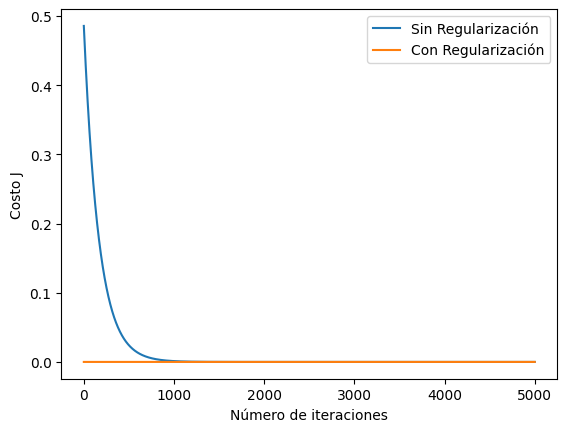

In [ ]:
alpha = 0.003
num_iters = 5000
lambda_ = 0.1
theta = np.zeros(X_train.shape[1])
thetaReg = np.zeros(X_train.shape[1])

theta, J_history = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters)

thetaReg, J_historyReg = gradientDescentMultiReg(X_train, y_train, theta, alpha, num_iters, lambda_)

print('theta calculado sin regularizacion: {:s}'.format(str(theta)))
print('theta calculado con regularizacion: {:s}'.format(str(thetaReg)))

pyplot.plot(np.arange(len(J_history)), J_history, label='Sin Regularización')
pyplot.plot(np.arange(len(J_historyReg)), J_historyReg, label='Con Regularización')
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.legend()

estado = np.dot(X_test, theta)
print('El TDSC sin regularización: {:.4f}'.format(estado[0]))
estadoReg = np.dot(X_test, thetaReg)

print('El TDSC con regularización: {:.4f}'.format(estadoReg[0]))

**Ambas predicciones son similares siendo sin regularizar la mas alta**

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
precision = modelo.score(X_test, y_test) * 100
print("Precisión de las predicciones en el conjunto de prueba: {:.2f}%".format(precision))

Precisión de las predicciones en el conjunto de prueba: 79.06%


# **Regresion polinomial**

In [658]:
pf = PolynomialFeatures(degree = 3)
print(X.shape)
X1 = pf.fit_transform(X.reshape(-1,1))
print(X1.shape)
regresion_lineal = LinearRegression()

X = X[:y.shape[0]]

if not isinstance(X1, np.ndarray) or not isinstance(y, np.ndarray):
    raise TypeError("X1 and y1 should be NumPy arrays.")

regresion_lineal.fit(X, y)

print('theta = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))


(11934, 17)
(202878, 4)
theta = [ 4.05531150e-02 -6.96696564e-03  1.31146696e-05  4.66651952e-05
  2.66342653e-05 -7.83970978e-04 -7.83970978e-04 -5.98910385e-04
 -2.48065457e-16 -2.39854862e-04  1.35439487e-01  9.71445147e-17
 -4.86981148e-02  2.46734876e-01 -2.44382908e-04  2.90570312e-01
 -1.44971019e-01], b = 1.1428826545915527


In [659]:
prediccion_entrenamiento = regresion_lineal.predict(X)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
r2 = regresion_lineal.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 1.1832615159896856e-05
Raíz del Error Cuadrático Medio (RMSE) = 0.003439856851657763
Coeficiente de Determinación R2 = 0.8000288037977435


In [669]:
y_pred = np.dot([1.14,	3	,289.96	,1349.49,	6677.38,	7.58,	7.58,	464.01,	288,	550.56,	1.1,	1	,5.95	,1.02,	7.14,	0.08,	0.95], theta)
print(y_pred)
y_predreg = np.dot([1.14,	3	,289.96	,1349.49,	6677.38,	7.58,	7.58,	464.01,	288,	550.56,	1.1,	1	,5.95	,1.02,	7.14,	0.08,	0.95], theta_reg)
print(y_predreg)

1.842013860637511
0.9856825900763946


# **Ecuacion de la normal**

**Volvemos a cargar el dataset para evitar problemas**

In [ ]:
url = "/content/drive/MyDrive/SIS420/Lab4/Maintenance Naval Vessel.csv"
dataframe1 = pd.read_csv(url)

In [ ]:
dataframe1 = dataframe1.drop("index", axis=1)

In [ ]:
data1 = dataframe1.values
X, y = data1[:, :17], data1[:, 17]
m1 = y.size
print(X.shape)
print(y.shape)

(11934, 17)
(11934,)


**Definimos la funcion normalEqn con y sin regularizar**

In [ ]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [ ]:
def normalEqnReg(X, y, lambda_=0.1):
    m = len(y)
    n = X.shape[1]
    lambda_matrix = lambda_ * np.eye(n)  # Crear la matriz de regularización lambda*I
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_matrix), X.T), y)
    return theta

**Hacemos las predicciones con las thetas con y sin regularizar**

In [ ]:
theta = normalEqn(X, y);
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));
X_array = [1.14,3,	289.96	,1349.49	,6677.38	,7.58,	7.58,	464.01	,288,	550.56	,1.1,	1,	5.95,	1.02	,7.14	,0.08,	0.95]
estado = np.dot(X_array, theta)

print('El TDSC sin regularización: {:.4f}'.format(estado))

Theta calculado a partir de la ecuación de la normal: [-6.10383809e+01  2.02850122e+01 -3.85501192e-04 -6.05609360e-03
  2.87329935e-03  3.98100046e+10 -3.98100046e+10 -1.09945703e-03
  6.83967251e-04 -2.39854863e-04  1.35439487e-01 -2.50223257e-01
 -4.86981147e-02  2.46734875e-01 -2.44382907e-04  2.90570311e-01
 -1.44971018e-01]
El TDSC sin regularización: 1.8420


In [ ]:
theta_reg = normalEqnReg(X, y, lambda_=0.1)
print('Theta regularizada',theta_reg)
X_array = [1.14,3,	289.96	,1349.49	,6677.38	,7.58,	7.58,	464.01	,288,	550.56	,1.1,	1,	5.95,	1.02	,7.14	,0.08,	0.95]
estado = np.dot(X_array, theta_reg)

print('El TDSC con regularización: {:.4f}'.format(estado))

Theta regularizada [ 1.47025375e-02  4.47547156e-04  1.27240376e-05  4.77319272e-05
  2.42065647e-05 -7.01361272e-04 -7.00606823e-04 -5.29790726e-04
  4.50420101e-03 -1.72999480e-04  1.33564403e-01  1.56396613e-05
 -4.84325118e-02  2.87932492e-02 -1.61902058e-04  2.33783880e-01
 -1.19313327e-01]
El TDSC con regularización: 0.9857


Se consiguió una diferencia en los resultados siendo el resultado sin regularizar el mayor, pero el que mas se asemeja a los datos seria el resultado regularizado

**Sacmos la precision en ambos casos**

In [ ]:
predicciones =(X.dot(theta_reg))
predicciones_redondeadas = np.round(predicciones)
precision = np.mean(predicciones_redondeadas == y) * 100
print("Precisión de las predicciones en el conjunto de prueba: {:.10f}%".format(precision))

Precisión de las predicciones en el conjunto de prueba: 23.0769230769%


In [ ]:
predicciones =(X.dot(theta))
predicciones_redondeadas = np.round(predicciones)
precision = np.mean(predicciones_redondeadas == y) * 100
print("Precisión de las predicciones en el conjunto de prueba: {:.10f}%".format(precision))

Precisión de las predicciones en el conjunto de prueba: 2.2540640188%


Aqui vemos que regularizado tener una mayor precisión

# **Dataset "Heart disease indicator" Regresion logística clasificación binaria**

Y = HeartDiseaseorAttack

In [ ]:
url = "/content/drive/MyDrive/SIS420/Lab4/heart_disease_health_indicators.csv"
dataframe2 = pd.read_csv(url)
print(dataframe2)

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
0                          0       1         1          1   40       1   
1                          0       0         0          0   25       1   
2                          0       1         1          1   28       0   
3                          0       1         0          1   27       0   
4                          0       1         1          1   24       0   
...                      ...     ...       ...        ...  ...     ...   
253656                     0       0         0          1   25       0   
253657                     0       0         1          1   24       0   
253658                     0       0         0          0   27       0   
253659                     0       0         1          1   37       0   
253660                     0       0         1          1   34       1   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0            0         0             0   

In [ ]:
print(dataframe2.describe())

       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253661.000000  253661.000000  253661.000000  253661.000000   
mean               0.094173       0.428990       0.424113       0.962667   
std                0.292070       0.494933       0.494209       0.189578   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253661.000000  253661.000000  253661.000000  253661.000000   
mean       28.382475       0.443186       0.040570       0.296904   
std         6.608638       0.496763       0.197292       0.698147   
min        12.000000       0.000000    

**No hay valores nulos en el dataset**

In [ ]:
data = dataframe2.values
X2, y2 = data[:, 1:], data[:, 0]

print(X2.shape)
print(y2.shape)

(253661, 21)
(253661,)


**Funcion sigmoidea**

In [ ]:
def sigmoid(z2):
    z2 = np.array(z2)

    g2 = np.zeros(z2.shape)

    g2 = 1 / (1 + np.exp(-z2))

    return g2

In [ ]:
z2 = [0, 0.5, 1]
g2 = sigmoid(z2)

print('g(', z2, ') = ', g2)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


**Separo el dataset en 2 805 para el entrenamiento y 20% para el test**

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=50)

scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)
print(X_test2.shape)
print(X_train2.shape)

(50733, 22)
(202928, 22)


**Concateno una columna de unos**

In [ ]:
m2, n2 = X2.shape
X2 = np.concatenate([np.ones((m2, 1)), X2], axis=1)

****Defino la funcion calcularCosto con y sin regularización****

In [ ]:
def calcularCosto(theta2, X2, y2):
    m2 = y2.size
    J2 = 0
    h2 = sigmoid(X2.dot(theta2.T))
    J2 = (1 / m2) * np.sum(-y2.dot(np.log(h2)) - (1 - y2).dot(np.log(1 - h2)))

    return J2


In [ ]:
def calcularCostoReg(theta2, X2, y2, lambda_2):
    m2 = y2.size
    J2 = 0
    h2 = sigmoid(X2.dot(theta2.T))
    temp = theta2.copy()
    temp[0] = 0
    J2 = (1 / m2) * np.sum(-y2.dot(np.log(h2)) - (1 - y2).dot(np.log(1 - h2))) + (lambda_2 / (2 * m2)) * np.sum(np.square(temp))

    return J2


**Defino la funcion descensoGradiente con y sin regularización**

In [ ]:
def descensoGradiente(theta2, X2, y2, alpha2, num_iters2):
    m2 = y2.shape[0]
    theta2 = theta2.copy()
    J_history2 = []
    for i in range(num_iters2):
        h2 = sigmoid(X2.dot(theta2.T))
        theta2 = theta2 - (alpha2 / m2) * (h2 - y2).dot(X2)

        J_history2.append(calcularCosto(theta2, X2, y2))
    return theta2, J_history2


In [ ]:
def descensoGradienteReg(theta2, X2, y2, alpha2, num_iters2, lambda_):
    m2 = y2.shape[0]
    theta2 = theta2.copy()
    J_history2 = []
    for i in range(num_iters2):
        h2 = sigmoid(X2.dot(theta2.T))
        temp2 = theta2.copy()
        temp2[0] = 0
        theta2 = theta2 - (alpha2 / m2) * ((h2 - y2).dot(X2) + lambda_ * temp2)

        J_history2.append(calcularCostoReg(theta2, X2, y2, lambda_))
    return theta2, J_history2


**Calculo las thetas para ambos casos**

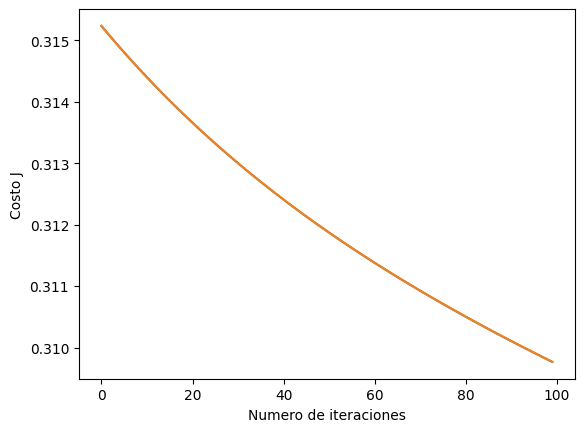

theta calculado por el descenso por el gradiente sin regularización: [-3.52878555e-03  1.85887601e-03  1.30423879e-03 -3.12367573e-03
 -6.92833805e-02  5.62157050e-05  1.00907072e-03  3.07352430e-03
 -3.85385833e-03 -2.60888124e-03 -3.33729866e-03 -4.24837981e-04
 -3.21711467e-03 -6.88873276e-05 -5.64889862e-04  1.87968703e-03
  2.56189633e-02  1.77993483e-03 -1.42376816e-04 -8.18242337e-03
 -2.06220637e-02 -2.91084787e-02]
theta calculado por el descenso por el gradiente con regularización: [-4.67130590e-03  4.47301180e-03  3.41790082e-03 -3.96730839e-03
 -7.18851081e-02  9.63465592e-04  2.02204770e-03  6.50863856e-03
 -5.62301429e-03 -3.63139410e-03 -4.64239035e-03 -6.98662437e-04
 -4.15384524e-03 -5.75222769e-05  3.22164899e-03  2.62530246e-03
  3.87695707e-02  3.46507633e-03  8.33261978e-04  1.08409588e-03
 -2.85604063e-02 -4.16038359e-02]


In [ ]:
alpha2 = 0.001
num_iters2 = 100
lambda_2 = 0.1

theta2 = np.zeros(22)
theta2, J_history2 = descensoGradiente(theta2, X2, y2, alpha2, num_iters2)
theta2reg, J_historyreg = descensoGradienteReg(theta2, X2, y2, alpha2, num_iters2, lambda_2)

pyplot.plot(np.arange(len(J_historyreg)), J_historyreg, label='Sin Regularización')
pyplot.plot(np.arange(len(J_historyreg)), J_historyreg, label='Con Regularización')
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.show()

print('theta calculado por el descenso por el gradiente sin regularización:', theta2)
print('theta calculado por el descenso por el gradiente con regularización:', theta2reg)


**Defino la función predict para hacer las predicciones**

In [ ]:
def predict(theta2, X2):
    m2 = X2.shape[0]
    p2 = np.zeros(m2)
    p2 = np.round(sigmoid(X2.dot(theta2.T)))
    return p2

**Calculamos la precisión con y sin regularización**

Se obtuvo la misma precisión para ambos casos

In [ ]:
p2reg = predict(theta2reg, X2)
print('Precisión con regularizacion: {:.2f} %'.format(np.mean(p2reg == y2) * 100))
p2 = predict(theta2, X2)
print('Precisión sin regularizacion: {:.2f} %'.format(np.mean(p2 == y2) * 100))

Precisión con regularizacion: 90.58 %
Precisión sin regularizacion: 90.58 %


**Hacemos las prediccion con y sin regularización**

Hay una leve diferencia en los resultados siendo el resultado con regularización el mayor

In [ ]:
X2_array = [1,	2,	1,	1,	22,	0	,1,	0,0,	1,	0,	0,	1	,0,	3	,30	,0,	1,	0,	12,	4	,4]
aprueba = sigmoid(np.dot(X2_array, theta2))

print('Predicciones de muerte por ataque al corazon sin regularización:{:.4f}'.format(aprueba))

aprueba = sigmoid(np.dot(X2_array, theta2reg))

print('Predicciones de muerte por ataque al corazon con regularización:{:.4f}'.format(aprueba))

Predicciones de muerte por ataque al corazon sin regularización:0.1454
Predicciones de muerte por ataque al corazon con regularización:0.1469


# **Dataset "Letter Recognition" para clasificación multiclase**

Y = letter

In [ ]:
url = "/content/drive/MyDrive/SIS420/Lab4/letter-recognition.csv"
dataframe3 = pd.read_csv(url)
print(dataframe3)

      letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  \
0          T      2      8       3       5       1      8     13      0   
1          I      5     12       3       7       2     10      5      5   
2          D      4     11       6       8       6     10      6      2   
3          N      7     11       6       6       3      5      9      4   
4          G      2      1       3       1       1      8      6      6   
...      ...    ...    ...     ...     ...     ...    ...    ...    ...   
19995      D      2      2       3       3       2      7      7      7   
19996      C      7     10       8       8       4      4      8      6   
19997      T      6      9       6       7       5      6     11      3   
19998      S      2      3       4       2       1      8      7      2   
19999      A      4      9       6       6       2      9      5      3   

       y2bar   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0           6       6      

In [ ]:
print(dataframe3.describe())

              xbox          ybox         width        height        onpix   \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              xbar          ybar          x2bar        y2bar         xybar   \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

**No hay valores nulos en el dataset**

**Modificación de valores**

En mi dataset la primera columna "letter" tenia valores de texto desde la A - Z que no son compatibles con el modelo

Modifico todas las letras cambiandolas por un valor numérico del 1 al 26 que representa el numero de clase

In [ ]:
mapeo_letras = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
                'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19,
                'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
dataframe3['letter'] = dataframe3['letter'].map(mapeo_letras)

# Imprimo el DataFrame resultante con la columna 'letter' modificada
print(dataframe3)

       letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  \
0          20      2      8       3       5       1      8     13      0   
1           9      5     12       3       7       2     10      5      5   
2           4      4     11       6       8       6     10      6      2   
3          14      7     11       6       6       3      5      9      4   
4           7      2      1       3       1       1      8      6      6   
...       ...    ...    ...     ...     ...     ...    ...    ...    ...   
19995       4      2      2       3       3       2      7      7      7   
19996       3      7     10       8       8       4      4      8      6   
19997      20      6      9       6       7       5      6     11      3   
19998      19      2      3       4       2       1      8      7      2   
19999       1      4      9       6       6       2      9      5      3   

       y2bar   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0           6  

**Convertir el dataset modificado en PANDAS**

Usare la variable data para convertir el dataset a un array compatible con numpy que guarde solo los valore

In [ ]:
data3 = dataframe3.values
X3, y3 = data3[:, 1:], data3[:, 0]
print(X3.shape)
print(y3.shape)

(20000, 16)
(20000,)


In [ ]:
print(y3)

[20  9  4 ... 20 19  1]


**Defino variables que coincidan con mi dataset para usarlas en las funciones**

In [ ]:
input_layer_size  = 17
num_labels3 = 26
m3 = y3.size

**Separo el dataset en 2 805 para el entrenamiento y 20% para el test**

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=50)
print(X_train3.shape)
print(X_test3.shape)

(16000, 16)
(4000, 16)


**Defino la funcion para calcular la sigmoide **

In [ ]:
def calcularSigmoide(z3):
    return 1.0 / (1.0 + np.exp(-z3))

**Defino la funcion calcularCosto con y sin regularización**

In [ ]:
def calcularCostoReg(theta3, X3, y3, lambda_3):
    m3 = y3.size

    if y3.dtype == bool:
        y3 = y3.astype(int)

    J3 = 0
    grad3 = np.zeros(theta3.shape)

    h3 = calcularSigmoide(X3.dot(theta3.T))

    temp = theta3
    temp[0] = 0

    J3 = (1 / m3) * np.sum(-y3.dot(np.log(h3)) - (1 - y3).dot(np.log(1 - h3))) + (lambda_3 / (2 * m3)) * np.sum(np.square(temp))

    grad3 = (1 / m3) * (h3 - y3).dot(X3)

    grad3 = grad3 + (lambda_3 / m3) * temp

    return J3, grad3

In [ ]:
def calcularCosto(theta3, X3, y3):
    m3 = y3.size

    if y3.dtype == bool:
        y3 = y3.astype(int)

    J3 = 0
    grad3 = np.zeros(theta3.shape)

    h3 = calcularSigmoide(X3.dot(theta3.T))

    J3 = (1 / m3) * np.sum(-y3.dot(np.log(h3)) - (1 - y3).dot(np.log(1 - h3)))

    grad3 = (1 / m3) * (h3 - y3).dot(X3)

    return J3, grad3

**Defino una theta de prueba**

In [ ]:

theta_t = np.array([0.5, 0.2, 0.8, 0.3, 0.1,0.4, 0.7, 0.1, 0.2, 0.5, 0.6, 0.6, 0.3, 0.7, 0.4, 0.8,0.9], dtype=float)

X_t = np.concatenate((np.ones((15, 17)), np.arange(1, 16).reshape(15, 1, order='F')/10.0), axis=1)

X_t = np.concatenate((np.ones((20000, 1)), np.random.rand(20000, 16)), axis=1)
print(X_t)

y_t = np.random.randint(0, 26, 20000)

lambda_3 = 0.2

[[1.         0.54808371 0.0298568  ... 0.27941346 0.88363884 0.82062196]
 [1.         0.01418573 0.75137529 ... 0.46328996 0.36671866 0.75329962]
 [1.         0.45535917 0.78090019 ... 0.68718846 0.25117908 0.56979285]
 ...
 [1.         0.74376778 0.78130867 ... 0.28267516 0.82654125 0.20223707]
 [1.         0.29680453 0.03084294 ... 0.9640902  0.21420032 0.15289034]
 [1.         0.14703864 0.25520454 ... 0.9897025  0.66920596 0.7515609 ]]


In [ ]:
J3reg, grad3reg = calcularCostoReg(theta_t, X_t, y_t, lambda_3)
J3, grad3 = calcularCosto(theta_t, X_t, y_t)
print('Costo         : {:.6f}'.format(J3))
print('Costo         : {:.6f}'.format(J3reg))
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad3))
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad3reg))

Costo         : -43.541195
Costo         : -49.264709
-----------------------
Gradientes:
 [-11.452416, -5.746086, -5.761740, -5.803620]
 [-11.442507, -5.741274, -5.757371, -5.798868]


Se logra ver una leve diferencia con un theta de prueba

**Defino la funcion oneVsAll con y sin regularizar**

In [ ]:
def oneVsAllReg(X3, y3, num_labels3, lambda_3):

    m3, n3 = X3.shape
    all_theta3 = np.zeros((num_labels3, n3 + 1))
    X3 = np.concatenate([np.ones((m3, 1)), X3], axis=1)

    for c in np.arange(num_labels3):
        initial_theta3 = np.zeros(n3 + 1)
        options = {'maxiter': 5000}
        res3 = optimize.minimize(calcularCostoReg,
                                initial_theta3,
                                (X3, (y3 == (c + 1)), lambda_3),
                                jac=True,
                                method='BFGS',
                                options=options)
        all_theta3[c] = res3.x
    return all_theta3


In [ ]:
def oneVsAll(X3, y3, num_labels3):

    m3, n3 = X3.shape
    all_theta3 = np.zeros((num_labels3, n3 + 1))
    X3 = np.concatenate([np.ones((m3, 1)), X3], axis=1)

    for c in np.arange(num_labels3):
        initial_theta3 = np.zeros(n3 + 1)
        options = {'maxiter': 5000}
        res3 = optimize.minimize(calcularCosto,
                                initial_theta3,
                                (X3, (y3 == (c + 1))),
                                jac=True,
                                method='BFGS',
                                options=options)
        all_theta3[c] = res3.x
    return all_theta3

**Calculamos las thetas con y sin regularización**

In [ ]:
lambda_3 = 0.2
all_theta3 = oneVsAllReg(X3, y3, num_labels3, lambda_3)
thetasinreg3 = oneVsAll(X3, y3, num_labels3)

**Defino la funcion predictOneVsAll con y sin regularizar**

In [ ]:
def predictOneVsAllReg(all_theta3, X3):
    m3 = X3.shape[0];
    num_labels3 = all_theta3.shape[0]

    p3 = np.zeros(m3)

    # Add ones to the X data matrix
    X3 = np.concatenate([np.ones((m3, 1)), X3], axis=1)
    p3 = np.argmax(calcularSigmoide(X3.dot(all_theta3.T)), axis = 1)

    return p3 + 1

In [ ]:
def predictOneVsAll(thetasinreg3, X3):
    m3 = X3.shape[0];
    num_labels3 = all_theta3.shape[0]

    p3 = np.zeros(m3)

    # Add ones to the X data matrix
    X3 = np.concatenate([np.ones((m3, 1)), X3], axis=1)
    p3 = np.argmax(calcularSigmoide(X3.dot(all_theta3.T)), axis = 1)

    return p3 + 1

**Probamos la precision y hacemos predicciones**

In [ ]:
pred_train = predictOneVsAllReg(all_theta3, X_train3)
pred_trainsinreg = predictOneVsAllReg(thetasinreg3, X_train3)
#calculamos la precisión del entrenamiento (80%)
precision_entrenamiento = np.mean(pred_train == y_train3) * 100
precision_entrenamientosinreg = np.mean(pred_trainsinreg == y_train3) * 100
print('Precisión del conjunto de entrenamiento con regularización: {:.2f}%'.format(precision_entrenamiento))
print('Precisión del conjunto de entrenamiento sin regularización: {:.2f}%'.format(precision_entrenamientosinreg))

XPrueba = X_test3[:100].copy()
yPrueba = y_test3.copy()
#concatenamos la columna de unos a XPrueba
XPrueba = np.concatenate((np.ones((100, 1)), XPrueba), axis=1)
print(XPrueba)
#Hacemos las predicciones del test (20%)
pred_prueba = np.argmax(calcularSigmoide(XPrueba.dot(all_theta3.T)), axis=1)
pred_pruebasinreg = np.argmax(calcularSigmoide(XPrueba.dot(thetasinreg3.T)), axis=1)

print('Predicciones en el conjunto de prueba con regularización:')
print(pred_prueba + 1)
print('Predicciones en el conjunto de prueba sin regularización:')
print(pred_pruebasinreg + 1)

Precisión del conjunto de entrenamiento con regularización: 73.12%
Precisión del conjunto de entrenamiento sin regularización: 73.12%
[[ 1.  3.  8. ...  8.  7.  7.]
 [ 1.  2.  7. ...  6.  0.  8.]
 [ 1.  2.  4. ... 10.  2.  5.]
 ...
 [ 1.  1.  3. ...  8.  1.  8.]
 [ 1.  2.  0. ...  8.  0.  8.]
 [ 1.  3.  6. ...  7.  7.  8.]]
Predicciones en el conjunto de prueba con regularización:
[ 5 10 20 22 12 15 14  6  7 10  4 11  2 19  3 23 21  9  7 14  5 22 24  7
 25 21 12  8 16 13 13  6 11  8 17 14 19  1 20  3 16  3  2 25  7  9 17  2
  3  3 20  7 20  3 26 21 11 18 13 20  3 17  8 24  4 13 21  8  3 11  9 18
 15 11 26  1  3 21  9 20  4  3  1 10 12 23 22  3 25 25 17 13 26 23 21 23
 11  9 12 18]
Predicciones en el conjunto de prueba sin regularización:
[ 5 10 20 22 12 15 14  6  7 10  4 11  2 19  3 23 21  9  7 14  5 22 24  7
 25 21 12  8 16 13 13  6 11  8 17 14 19  1 20  3 16  3  2 25  7  9 17  2
  3  3 20  7 20  3 26 21 11 18 13 20  3 17  8 24  4 13 21  8  3 11  9 18
 15 11 26  1  3 21  9 20  4  3  1

**Con o sin regularización se consiguió la misma precisión y predicciones**